# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data
Importing the required libraries

In [3]:
# importing required libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [106]:
# Extracting the bike sharing data in a dataframe
bike_df = pd.read_csv("day.csv")

In [108]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
# Understanding the type of variables
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [112]:
# Checking the shape of the dataframe
bike_df.shape

(730, 16)

In [114]:
# Checking stats of all the variables
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

With this step we will find if there is multicollinearity and also identify if some predictors have a strong association with the outcome variable.

#### Visualising numerical values using Pairplot

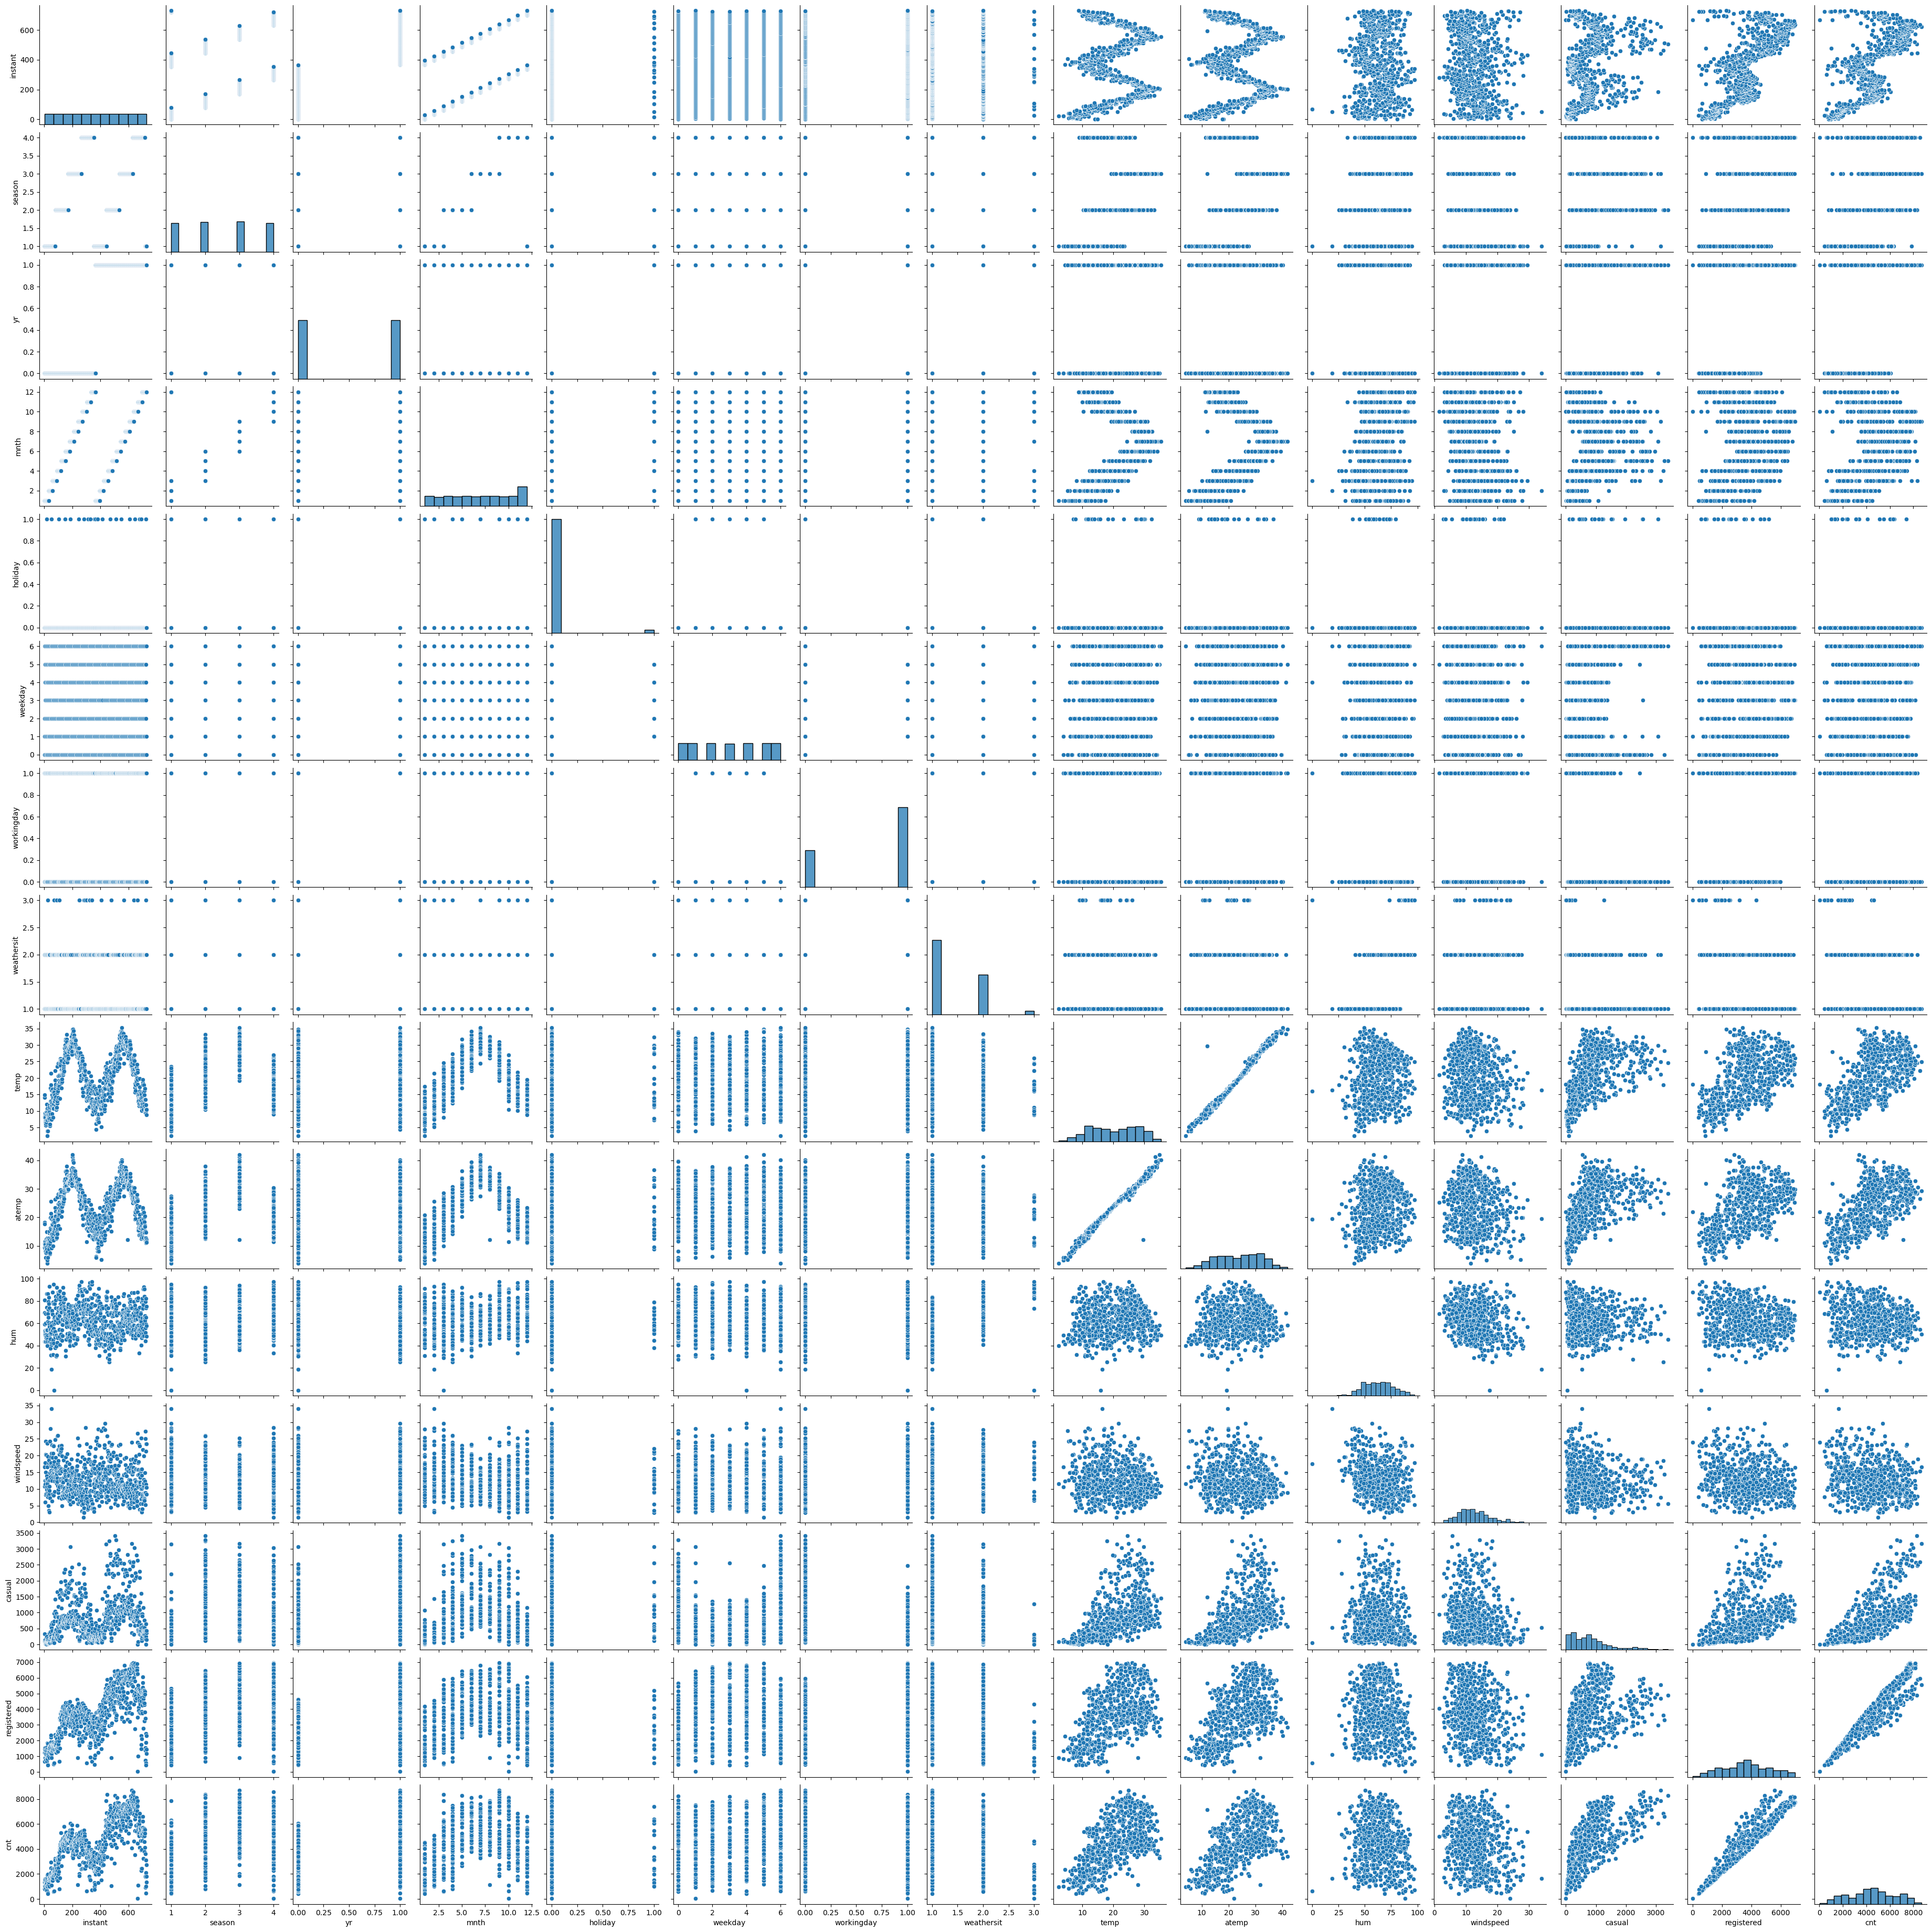

In [116]:
sns.pairplot(bike_df)
plt.show()

## Step 3:  Data Handling and Cleaning
#### Convert numeric to categorical values

In [122]:
# Convert integer season columns values to meaningful string values
bike_df["season"] = bike_df["season"].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [124]:
# Convert integer weathersit columns values to meaningful string values
bike_df["weathersit"] = bike_df["weathersit"].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain'})

In [126]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping unnecessary columns

In [128]:
# Dropping columns that won't add any predictive value
bike_df.drop(columns=["instant", "dteday", "casual", "registered"], inplace = True)

In [130]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating dummy variables for categorical columns

In [132]:
bike_df = pd.get_dummies(bike_df, columns = ["season", "weathersit", "mnth", "weekday"], drop_first = True).astype(int)

In [134]:
# Check the data after cleaning
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14,18,80,10,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14,17,69,16,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8,9,43,16,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [137]:
from sklearn.model_selection import train_test_split

In [425]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [427]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,19,23,55,12,7534,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1,0,1,29,33,70,11,7216,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16,20,62,10,4066,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,10,11,48,23,1796,1,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,15,18,48,8,4220,0,1,...,0,0,0,0,0,0,0,0,0,1


In [429]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,19.601961,22.970588,62.633333,12.329412,4486.382353,0.243137,0.245098,...,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,7.429062,8.100615,14.152997,5.295336,1952.158739,0.429398,0.430568,...,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,2.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.000000,16.000000,52.000000,9.000000,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.000000,23.500000,63.000000,12.000000,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.000000,30.000000,73.000000,15.000000,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.000000,42.000000,97.000000,34.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


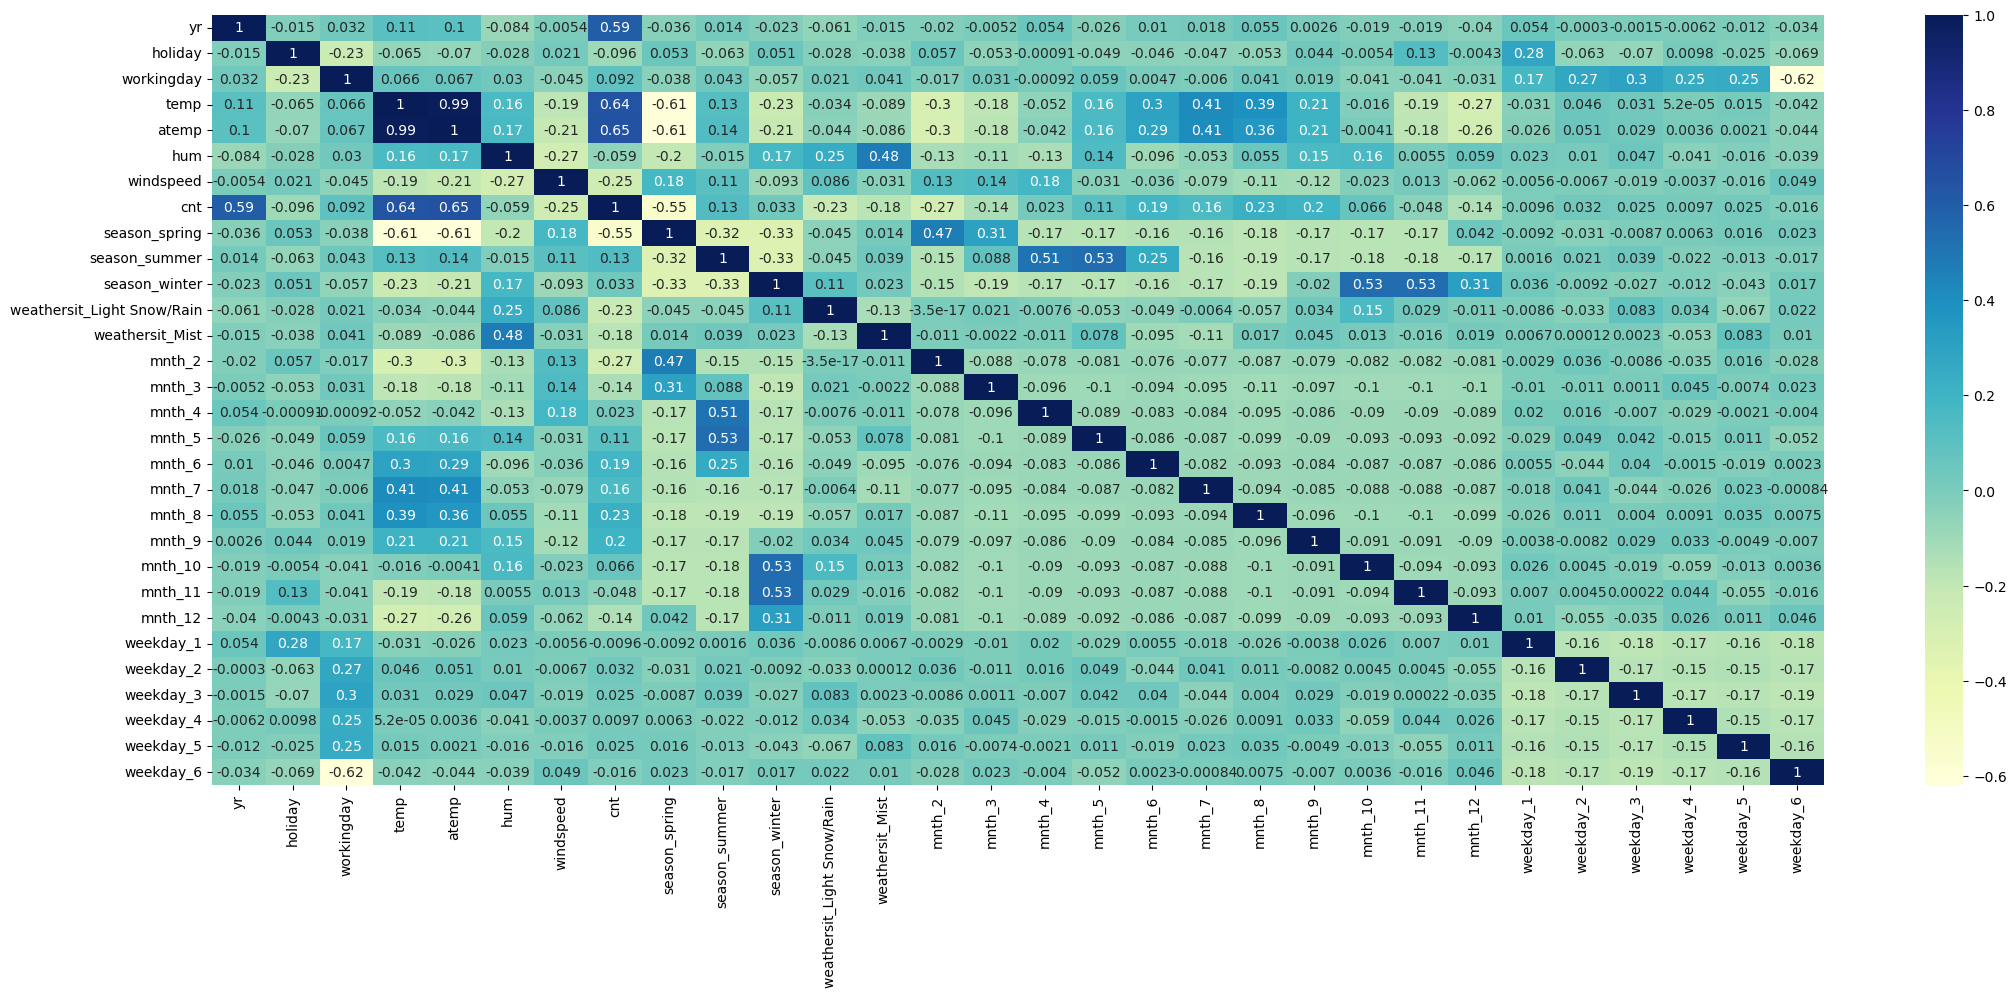

In [431]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can see from the heatmap, temp seems to be correlated to cnt the most. Let's see a pairplot for temp vs cnt.

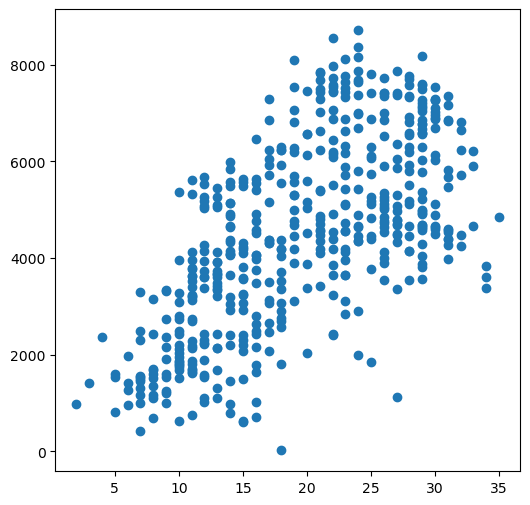

In [433]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [435]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`.

In [175]:
import statsmodels.api as sm

We need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [437]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

In [439]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [441]:
# Check the parameters obtained
lr.params

const    1169.981291
temp      169.187210
dtype: float64

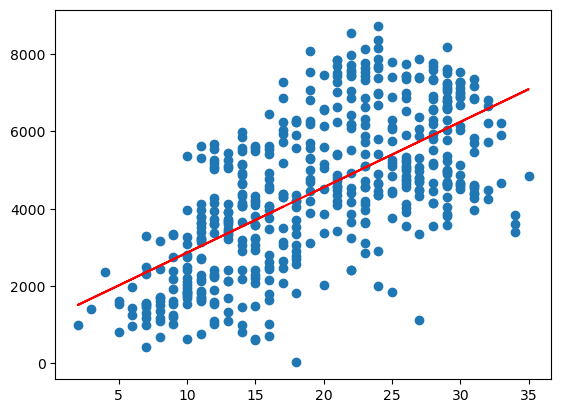

In [443]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1169.98 + 169.19*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [445]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           4.81e-61
Time:                        21:45:28   Log-Likelihood:                -4450.8
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1169.9813    186.976      6.257      0.0

### Adding another variable

The R-squared value obtained is `0.415`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [447]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [449]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

In [451]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [453]:
lr.params

const     420.673262
temp      154.086765
yr       2058.325268
dtype: float64

In [455]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     563.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.53e-129
Time:                        21:45:45   Log-Likelihood:                -4288.9
No. Observations:                 510   AIC:                             8584.
Df Residuals:                     507   BIC:                             8597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.6733    140.777      2.988      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.690 from 0.415. Let's go ahead and add another variable, atemp.

In [457]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr', 'atemp']]

In [459]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

In [461]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [463]:
lr.params

const     182.042551
temp       16.555426
yr       2066.914326
atemp     127.561067
dtype: float64

In [465]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     386.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.94e-130
Time:                        21:46:02   Log-Likelihood:                -4283.5
No. Observations:                 510   AIC:                             8575.
Df Residuals:                     506   BIC:                             8592.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.0426    157.173      1.158      0.2

### Adding all the variables to the model

In [467]:
# Check all the columns of the dataframe

bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow/Rain', 'weathersit_Mist', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [469]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

In [471]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [473]:
lr_1.params

const                         1845.619285
yr                            2016.347152
holiday                       -358.404838
workingday                     382.928601
temp                            92.465115
atemp                           22.230435
hum                            -13.604485
windspeed                      -50.383437
season_spring                 -446.727645
season_summer                  309.081844
season_winter                  890.533598
weathersit_Light Snow/Rain   -2236.118427
weathersit_Mist               -532.639298
mnth_2                         268.595624
mnth_3                         578.437917
mnth_4                         562.561317
mnth_5                         785.468602
mnth_6                         567.133399
mnth_7                         236.156916
mnth_8                         711.217698
mnth_9                        1274.406965
mnth_10                        625.471120
mnth_11                        193.701895
mnth_12                        161

In [475]:
# Check the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.62
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.68e-180
Time:                        21:46:14   Log-Likelihood:                -4098.5
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [235]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [477]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,weekday_4,inf
27,weekday_5,inf
23,weekday_1,inf
1,holiday,inf
25,weekday_3,inf
24,weekday_2,inf
2,workingday,inf
3,temp,463.96
4,atemp,439.28
5,hum,33.42


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the Variable and Updating the Model

In [479]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(columns = ['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'holiday'])

In [481]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [483]:
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [485]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.51e-184
Time:                        21:46:28   Log-Likelihood:                -4101.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     486   BIC:                             8353.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [487]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,457.51
3,atemp,434.67
4,hum,33.26
8,season_winter,10.43
7,season_summer,8.96
17,mnth_8,8.92
16,mnth_7,7.96
6,season_spring,7.53
5,windspeed,7.41
14,mnth_5,6.84


In [489]:
X = X.drop('atemp', axis = 1)

In [491]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [493]:
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [495]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.80e-185
Time:                        21:46:37   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     487   BIC:                             8347.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [497]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,53.07
3,hum,32.90
7,season_winter,10.34
16,mnth_8,8.92
6,season_summer,8.88
15,mnth_7,7.96
5,season_spring,7.39
4,windspeed,7.18
13,mnth_5,6.84
14,mnth_6,6.62


In [499]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth_7', axis = 1)

In [501]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [503]:
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [505]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.12e-186
Time:                        21:46:49   Log-Likelihood:                -4102.2
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     488   BIC:                             8342.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [507]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.66
2,temp,22.45
7,season_winter,9.85
6,season_summer,8.50
4,windspeed,6.98
5,season_spring,5.64
1,workingday,4.83
17,mnth_10,4.38
18,mnth_11,4.33
13,mnth_5,3.84


In [509]:
X = X.drop('season_summer', axis = 1)

In [511]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [513]:
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [515]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.22e-187
Time:                        21:46:59   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     489   BIC:                             8337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [517]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.56
2,temp,19.94
6,season_winter,9.34
4,windspeed,6.71
1,workingday,4.79
16,mnth_10,4.38
17,mnth_11,4.33
5,season_spring,4.12
18,mnth_12,2.90
8,weathersit_Mist,2.31


In [519]:
X = X.drop('windspeed', axis = 1)

In [521]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [523]:
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [525]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.36e-177
Time:                        21:47:13   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     490   BIC:                             8381.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [527]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.42
2,temp,17.99
5,season_winter,9.33
1,workingday,4.75
15,mnth_10,4.32
16,mnth_11,4.19
4,season_spring,3.59
17,mnth_12,2.85
7,weathersit_Mist,2.30
0,yr,2.10


In [529]:
X = X.drop('season_winter', axis = 1)

In [531]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [533]:
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [535]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.40e-175
Time:                        21:47:25   Log-Likelihood:                -4135.8
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     491   BIC:                             8390.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [537]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.03
2,temp,17.35
1,workingday,4.71
4,season_spring,3.05
6,weathersit_Mist,2.28
0,yr,2.08
12,mnth_8,2.00
17,weekday_6,1.83
14,mnth_10,1.80
10,mnth_5,1.78


In [539]:
X = X.drop('hum', axis = 1)

In [541]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [543]:
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [545]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.15e-176
Time:                        21:47:41   Log-Likelihood:                -4137.3
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     492   BIC:                             8387.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [547]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.96
1,workingday,4.63
3,season_spring,2.30
0,yr,2.08
11,mnth_8,1.99
16,weekday_6,1.81
10,mnth_6,1.70
12,mnth_9,1.66
9,mnth_5,1.64
5,weathersit_Mist,1.57


In [549]:
X = X.drop('mnth_2', axis = 1)

In [551]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [553]:
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [555]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          9.64e-177
Time:                        21:47:55   Log-Likelihood:                -4138.2
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     493   BIC:                             8382.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [557]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.92
1,workingday,4.62
0,yr,2.08
10,mnth_8,1.97
15,weekday_6,1.81
3,season_spring,1.76
9,mnth_6,1.69
11,mnth_9,1.65
8,mnth_5,1.63
5,weathersit_Mist,1.57


In [559]:
X = X.drop('mnth_4', axis = 1)

In [561]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [563]:
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [565]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.83e-177
Time:                        21:48:08   Log-Likelihood:                -4139.1
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     494   BIC:                             8378.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [567]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.41
1,workingday,4.47
0,yr,2.05
14,weekday_6,1.78
9,mnth_8,1.72
3,season_spring,1.64
5,weathersit_Mist,1.56
8,mnth_6,1.52
10,mnth_9,1.48
7,mnth_5,1.46


In [569]:
X = X.drop('mnth_12', axis = 1)

In [571]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [573]:
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [575]:
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          5.82e-178
Time:                        21:48:20   Log-Likelihood:                -4140.6
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     495   BIC:                             8375.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [577]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.38
1,workingday,4.32
0,yr,2.05
13,weekday_6,1.72
9,mnth_8,1.67
3,season_spring,1.64
5,weathersit_Mist,1.55
8,mnth_6,1.49
10,mnth_9,1.44
7,mnth_5,1.42


In [579]:
X = X.drop('mnth_3', axis = 1)

In [581]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [583]:
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [585]:
# Print the summary of the model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.06e-177
Time:                        21:48:30   Log-Likelihood:                -4143.9
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     496   BIC:                             8375.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [587]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.28
1,workingday,4.29
0,yr,2.05
12,weekday_6,1.72
8,mnth_8,1.63
3,season_spring,1.56
5,weathersit_Mist,1.55
7,mnth_6,1.46
9,mnth_9,1.41
6,mnth_5,1.40


In [589]:
X = X.drop('mnth_11', axis = 1)

In [591]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [593]:
lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [595]:
# Print the summary of the model
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.76e-178
Time:                        21:48:41   Log-Likelihood:                -4144.8
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     497   BIC:                             8371.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [597]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.17
1,workingday,4.22
0,yr,2.04
11,weekday_6,1.70
8,mnth_8,1.56
5,weathersit_Mist,1.54
3,season_spring,1.48
7,mnth_6,1.41
9,mnth_9,1.35
6,mnth_5,1.34


In [599]:
X = X.drop('mnth_8', axis = 1)

In [601]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [603]:
lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [605]:
# Print the summary of the model
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.41e-179
Time:                        21:48:53   Log-Likelihood:                -4145.5
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     498   BIC:                             8366.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [607]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.70
1,workingday,4.20
0,yr,2.04
10,weekday_6,1.69
5,weathersit_Mist,1.54
3,season_spring,1.42
7,mnth_6,1.27
6,mnth_5,1.23
8,mnth_9,1.23
9,mnth_10,1.18


In [609]:
X = X.drop('mnth_6', axis = 1)

In [611]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [613]:
lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [615]:
# Print the summary of the model
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.6
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.74e-180
Time:                        21:49:03   Log-Likelihood:                -4146.1
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     499   BIC:                             8361.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [617]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.07
1,workingday,4.19
0,yr,2.03
9,weekday_6,1.69
5,weathersit_Mist,1.53
3,season_spring,1.41
6,mnth_5,1.19
7,mnth_9,1.19
8,mnth_10,1.16
4,weathersit_Light Snow/Rain,1.08


In [619]:
X = X.drop('mnth_5', axis = 1)

In [621]:
# Build a linear model
X_train_lm = sm.add_constant(X)

In [623]:
lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [625]:
# Print the summary of the model
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.19e-180
Time:                        21:49:14   Log-Likelihood:                -4148.1
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [627]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.90
1,workingday,4.19
0,yr,2.03
8,weekday_6,1.69
5,weathersit_Mist,1.51
3,season_spring,1.38
6,mnth_9,1.16
7,mnth_10,1.14
4,weathersit_Light Snow/Rain,1.08


Now as we can see, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [629]:
y_train_cnt = lr_16.predict(X_train_lm)

Text(0.5, 0, 'Errors')

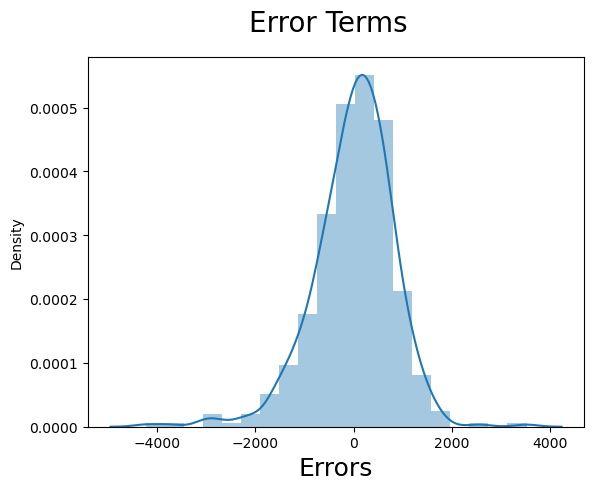

In [631]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 16th model.

In [634]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.283105,23.776256,61.493151,12.100457,4546.981735,0.255708,0.264840,...,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,7.697982,8.308843,14.447428,4.968612,1898.633630,0.437258,0.442259,...,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,3.000000,4.000000,25.000000,1.000000,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.000000,17.000000,50.500000,9.000000,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.000000,24.000000,60.000000,12.000000,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.000000,31.000000,72.000000,15.000000,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.000000,41.000000,97.000000,27.000000,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [636]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   yr                          219 non-null    int64
 1   holiday                     219 non-null    int64
 2   workingday                  219 non-null    int64
 3   temp                        219 non-null    int64
 4   atemp                       219 non-null    int64
 5   hum                         219 non-null    int64
 6   windspeed                   219 non-null    int64
 7   cnt                         219 non-null    int64
 8   season_spring               219 non-null    int64
 9   season_summer               219 non-null    int64
 10  season_winter               219 non-null    int64
 11  weathersit_Light Snow/Rain  219 non-null    int64
 12  weathersit_Mist             219 non-null    int64
 13  mnth_2                      219 non-null    int64
 14  mnth_3        

In [638]:
y_test = df_test.pop('cnt')
X_test = df_test

In [640]:
# Adding constant variable to test dataframe
X_test_m16 = sm.add_constant(X_test)

In [642]:
# Creating X_test_m16 dataframe by dropping variables from X_test_m16
X_test_m16 = X_test_m16.drop(['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'holiday', 'mnth_2', 
                            'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'season_summer',
                             'season_winter', 'atemp', 'hum', 'windspeed'], axis = 1)

In [644]:
# Making predictions using the 16th model
y_pred_m16 = lr_16.predict(X_test_m16)

## Step 8: Model Evaluation

Let's plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

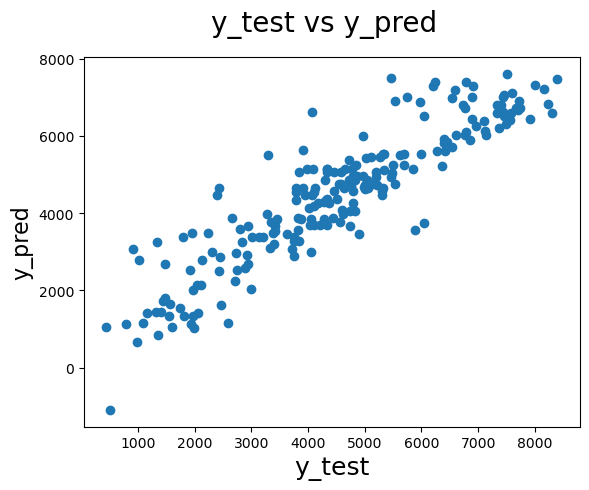

In [647]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m16)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [649]:
# Calculate the R-squared score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m16)

0.8182831353768196